# DSGE Model

#### Dynamic IS:
$$ x_t = E_tx_{t+1}-\frac{1}{\sigma}(i_t-E_t\pi_{t+1}) $$

Where:

$x_t \equiv$ output gap at instant $t$

$i_t \equiv$ nominal interest rate at instant $t$

$\pi_t \equiv$ inflation rate at instant $t$

#### Phillips curve:
$$ \pi_t = \beta E_t\pi_{t+1} - \kappa x_t $$

Where:

$\kappa \equiv \lambda \left( \sigma + \frac{\phi+\alpha}{1-\alpha} \right)$

#### Monetary policy rule:
$$ i_t = \varphi_\pi \pi_t + \nu_t $$
$$ \nu_{t+1} = \rho \nu_t + v\varepsilon_{t+1}$$

Where:

$\varepsilon_t \sim N(0,1)$

---

## Log linear model

#### Blanchard Kahn
The model may be described by the following system of equations:


$$
\left\{\begin{matrix}
x_t &=& E_tx_{t+1}-\frac{1}{\sigma}(i_t-E_t\pi_{t+1}) \\ 
\pi_t &=& \beta E_t\pi_{t+1} + \kappa x_t \\
i_t &=& \varphi_\pi \pi_t + \nu_t\\
\nu_{t+1} &=& \rho \nu_t + v\varepsilon_{t+1}
\end{matrix}\right.
$$

$$\Leftrightarrow$$

$$
\left\{\begin{matrix}
\nu_{t+1} &&&& &=& \rho \nu_t &&&& &+& v\varepsilon_{t+1} \\
&&E_tx_{t+1} &+& \frac{1}{\sigma}E_t\pi_{t+1}   &=&\frac{1}{\sigma} \nu_t &+& x_t &+&\frac{\varphi_\pi}{\sigma} \pi_t && \\ 
&&&& \beta E_t\pi_{t+1} &=& && - \kappa x_t &+& \pi_t  &&
\end{matrix}\right.
$$

Or, in matrix notation:

$$
\left[\begin{matrix}
1 & 0 & 0 \\
0 & 1 & \frac{1}{\sigma} \\
0 & 0 & \beta
\end{matrix}\right]
\left[\begin{matrix}
\nu_{t+1} \\
E_tx_{t+1} \\
E_t\pi_{t+1}
\end{matrix}\right]
=
\left[\begin{matrix}
\rho & 0 & 0 \\
\frac{1}{\sigma} & 1 & \frac{\varphi_\pi}{\sigma} \\
0 & -\kappa & 1
\end{matrix}\right]
\left[\begin{matrix}
\nu_t \\
x_t \\
\pi_t
\end{matrix}\right]
+
\left[\begin{matrix}
v \\
0 \\
0
\end{matrix}\right]
\varepsilon_{t+1}
$$

$$\Leftrightarrow$$

$$ A_0
\left[\begin{matrix}
\omega_{t+1} \\
E_ty_{t+1}
\end{matrix}\right]
=
A_1
\left[\begin{matrix}
\omega_t \\
y_t
\end{matrix}\right]
+B\varepsilon_{t+1}
$$

Where $\omega_t$ is the $(p \times 1)$ vector that represents *predetermined variables*, and $y_t$ the $(k \times 1)$ vector that represents *forward-looking control variables*. In our case, $p=1$ and $k=2$.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

sigma = 1.0
beta = 0.99
rho = 0.75
phi_pi = 1.4
v = 1
omega = 0.5
alpha = 3.0

kappa = (1-omega)*(1-beta*omega)/(alpha*omega)

p = 1
k = 2

A0 = np.array([[1,0,       0],
               [0,1, 1/sigma],
               [0,0,    beta]])

A1 = np.array([[    rho,     0,           0],
               [1/sigma,     1,phi_pi/sigma],
               [      0,-kappa,           1]])

B = np.array([[v],
              [0],
              [0]])

Going further:

$$\left[\begin{matrix}
\omega_{t+1} \\
E_ty_{t+1}
\end{matrix}\right]=
A_0^{-1}A_1
\left[\begin{matrix}
\omega_t \\
y_t
\end{matrix}\right]
+A_0^{-1}B\varepsilon_{t+1}=
A
\left[\begin{matrix}
\omega_t \\
y_t
\end{matrix}\right]
+A_0^{-1}B\varepsilon_{t+1}
$$


*Jordan decomposition* of matrix $A=P\Lambda P^{-1}$ yields:
$$
\left[\begin{matrix}
\omega_{t+1} \\
E_ty_{t+1}
\end{matrix}\right]
=P\Lambda P^{-1}
\left[\begin{matrix}
\omega_t \\
y_t
\end{matrix}\right]
+A_0^{-1}B\varepsilon_{t+1}$$

$$\Leftrightarrow$$

$$
P^{-1}
\left[\begin{matrix}
\omega_{t+1} \\
E_ty_{t+1}
\end{matrix}\right]
=\Lambda P^{-1}
\left[\begin{matrix}
\omega_t \\
y_t
\end{matrix}\right]
+P^{-1}A_0^{-1}B\varepsilon_{t+1}
$$

It is convenient to sort the eigenvalues in $\Lambda$. The **Blanchard Kahn** condition states that the number of eigenvalues in the unit circle must be greater or equal to $p$, i.e. the number of predetermined variables.

In [2]:
A = np.dot(np.linalg.inv(A0),A1)
Lambda,P = np.linalg.eig(A)

idx=np.abs(Lambda).argsort()
Lambda = np.diag(Lambda[idx])
P = P[:,idx]

Lambda,P

(array([[ 0.75000000+0.j        ,  0.00000000+0.j        ,  0.00000000+0.j        ],
        [ 0.00000000+0.j        ,  1.09006734+0.24474751j,  0.00000000+0.j        ],
        [ 0.00000000+0.j        ,  0.00000000+0.j        ,
          1.09006734-0.24474751j]]),
 array([[ 0.49186033+0.j        ,  0.00000000-0.j        ,  0.00000000+0.j        ],
        [-0.72876932+0.j        ,  0.83446506+0.j        ,  0.83446506-0.j        ],
        [-0.47641231+0.j        , -0.17114460+0.52381065j,
         -0.17114460-0.52381065j]]))

Then, we may split matrix $P^{-1}$ in four submatrixes:
$$P^{-1}=
\left[\begin{matrix}
P^*_{11} & P^*_{12} \\
P^*_{21} & P^*_{22}
\end{matrix}\right]
$$

Where $P^*_{11}$ is $(p \times p)$ and $P^*_{22}$ is $(k \times k)$, such that:
$$
\left[\begin{matrix}
\omega_{t+1}^* \\
E_ty_{t+1}^*
\end{matrix}\right]
= P^{-1}
\left[\begin{matrix}
\omega_{t+1} \\
E_ty_{t+1}
\end{matrix}\right]
$$

Therefore:
$$
\left[\begin{matrix}
\omega_{t+1}^* \\
E_ty_{t+1}^*
\end{matrix}\right]
= \Lambda
\left[\begin{matrix}
\omega_{t}^* \\
y_{t}^*
\end{matrix}\right]
+Q\varepsilon_{t+1}
$$

$$\Leftrightarrow$$

$$
\left\{\begin{matrix}
\omega_{t+1}^* &=& \Lambda_1 \omega_{t}^* + Q_1\varepsilon_{t+1} \\
E_ty_{t+1}^* &=& \Lambda_2 y_{t}^* + Q_2\varepsilon_{t+1}
\end{matrix}\right.
$$

Where $Q=P^{-1}A_0^{-1}B$, and $\Lambda$ and $Q$ are split in the same way as $P$.

In [3]:
invP = np.linalg.inv(P)

Pstar11 = np.real(invP[:p,:p])
Pstar12 = np.real(invP[:p,p:])
Pstar21 = np.real(invP[p:,:p])
Pstar22 = np.real(invP[p:,p:])

Lambda1 = np.real(Lambda[:p,:p])
Lambda2 = np.real(Lambda[p:,p:])

Q = np.dot(np.dot(invP,np.linalg.inv(A0)),B)
Q1 = np.real(Q[:p,:p])
Q2 = np.real(Q[p:,p:])



#### State space equations

The forecast in instant $t$ of $y^*_{t+j}$ is obtained recursevely from the second equation: 

$$
E_ty_{t+j}^* = \Lambda_2 E_ty_{t+j-1}^* + Q_2E_t\varepsilon_{t+j} = \Lambda_2 (\Lambda_2 E_ty_{t+j-2}^* + Q_2E_t\varepsilon_{t+j-1}) + Q_2E_t\varepsilon_{t+j} = \dots = \Lambda_2^{j-1}E_ty_{t+1}^*
$$

In the steady state $y^*_{t}=0$. From the definition of $y^*_{t}$, we have:
$$ y^*_{t}=0 \Rightarrow y^*_{t} = P^*_{21}\omega_t + P^*_{22}y_t = 0 $$
$$\Leftrightarrow$$
$$y_t= -{P^*_{22}}^{-1}P^*_{21}\omega_t$$

From the definition of $\omega^*_{t}$:
$$ \omega^*_{t} = P^*_{11}\omega_t + P^*_{12}y_t  = P^*_{11}\omega_t + P^*_{12} (-{P^*_{22}}^{-1}P^*_{21}\omega_t)$$
$$\Leftrightarrow$$
$$ \omega^*_{t} = (P^*_{11}- P^*_{12}{P^*_{22}}^{-1}P^*_{21})\omega_t$$

From the first equation in the system:
$$ \omega^*_{t+1} = \Lambda_1 \omega_{t}^* + Q_1\varepsilon_{t+1}$$
$$\Rightarrow $$
$$(P^*_{11}- P^*_{12}{P^*_{22}}^{-1}P^*_{21})\omega_{t+1} = \Lambda_1 (P^*_{11}- P^*_{12}{P^*_{22}}^{-1}P^*_{21})\omega_t + Q_1\varepsilon_{t+1} $$
$$\Leftrightarrow $$
$$\omega_{t+1} = {(P^*_{11}- P^*_{12}{P^*_{22}}^{-1}P^*_{21})}^{-1}\Lambda_1 (P^*_{11}- P^*_{12}{P^*_{22}}^{-1}P^*_{21})\omega_t + {(P^*_{11}- P^*_{12}{P^*_{22}}^{-1}P^*_{21})}^{-1}Q_1\varepsilon_{t+1} $$

Therefore, the equation in state space form is given by:

$$
\left\{\begin{matrix}
y_t &=& H_{bk} \omega_{t}&& \\
\omega_{t+1} &=& F_{bk} \omega_{t} &+& Q_{bk} \varepsilon_{t+1}
\end{matrix}\right.
$$

Where

$H_{bk} \equiv -{P^*_{22}}^{-1}P^*_{21}$

$F_{bk} \equiv {(P^*_{11}- P^*_{12}{P^*_{22}}^{-1}P^*_{21})}^{-1}\Lambda_1 (P^*_{11}- P^*_{12}{P^*_{22}}^{-1}P^*_{21})$

$Q_{bk} \equiv {(P^*_{11}- P^*_{12}{P^*_{22}}^{-1}P^*_{21})}^{-1}Q_1$

Memo:

$\omega_{t} = \begin{bmatrix}\nu_{t}\end{bmatrix}$

$y_{t} = \begin{bmatrix}x_{t} \\ \pi_{t}\end{bmatrix}$

#### Reparametrization to feed the Kalman Filter
$$
\left\{\begin{matrix}
y_t &=& H_{bk} \omega_{t}&& \\
\omega_{t+1} &=& F_{bk} \omega_{t} &+& Q_{bk} \varepsilon_{t+1}
\end{matrix}\right.
\Leftrightarrow
\left\{\begin{matrix}
y_t &=& H_{bk} \omega_{t}&& \\
\omega_{t} &=& F_{bk} \omega_{t-1} &+& Q_{bk} \varepsilon_{t}
\end{matrix}\right.
$$

$$
\Leftrightarrow
$$

$$
\left\{\begin{matrix}
y_t &=& H_{bk} (F_{bk} \omega_{t-1} Q_{bk} \varepsilon_{t})&& \\
\omega_{t} &=& F_{bk} \omega_{t-1} &+& Q_{bk} \varepsilon_{t}
\end{matrix}\right.
\Leftrightarrow
\left\{\begin{matrix}
y_t &=& H_{bk} F_{bk} \omega_{t-1} &+& H_{bk} Q_{bk} \varepsilon_{t} \\
\omega_{t} &=& F_{bk} \omega_{t-1} &+& Q_{bk} \varepsilon_{t}
\end{matrix}\right.
$$

Let $x_t = \begin{bmatrix}y_t\\\omega_t \end{bmatrix} $. Then we can rewrite the system in state space form:
$$
\left\{\begin{matrix}
y_t &=& 0_{(k \times k)} y_t &+& H_{bk} F_{bk} \omega_{t-1} &+& H_{bk} Q_{bk} \varepsilon_{t} \\
\omega_{t} &=& 0_{(p \times k)} y_t &+& F_{bk} \omega_{t-1} &+& Q_{bk} \varepsilon_{t}
\end{matrix}\right.
$$

$$\Leftrightarrow$$

$$
\left\{\begin{matrix}
y_t &=& I_ky_t &+& 0_{(k \times p)} \omega_t\\ \\
y_t &=& 0_{(k \times k)} y_{t-1} &+& H_{bk} F_{bk} \omega_{t-1} &+& H_{bk} Q_{bk} \varepsilon_{t} \\
\omega_{t} &=& 0_{(p \times k)} y_{t-1} &+& F_{bk} \omega_{t-1} &+& Q_{bk} \varepsilon_{t}
\end{matrix}\right.
$$

$$\Leftrightarrow$$

$$
\left\{\begin{matrix}
y_t &=& \begin{bmatrix} I_k & 0_{(k \times p)} \end{bmatrix} \begin{bmatrix} y_t \\ \omega_t \end{bmatrix} \\
\begin{bmatrix} y_t \\ \omega_t \end{bmatrix}&=&\begin{bmatrix}0_{(k \times k)}&H_{bk} F_{bk}\\0_{(p \times k)}&F_{bk}\end{bmatrix}\begin{bmatrix} y_t \\ \omega_t \end{bmatrix}
&+&\begin{bmatrix} H_{bk} Q_{bk} \\ Q_{bk} \end{bmatrix} \varepsilon_{t}
\end{matrix}\right.
$$

$$\Leftrightarrow$$

$$
\left\{\begin{matrix}
y_t &=& H x_t \\
x_t &=& F x_{t-1} &+& Q\varepsilon_{t}
\end{matrix}\right.
$$

$$\Leftrightarrow$$

$$
\left\{\begin{matrix}
y_t &=& H x_t \\
x_{t+1} &=& F x_{t} &+& Q\varepsilon_{t+1}
\end{matrix}\right.
$$

Where

$H \equiv \begin{bmatrix} I_k & 0_{(k \times p)} \end{bmatrix}$

$F \equiv \begin{bmatrix}0_{(k \times k)}&H_{bk} F_{bk}\\0_{(p \times k)}&F_{bk}\end{bmatrix}$

$Q \equiv \begin{bmatrix} H_{bk} Q_{bk} \\ Q_{bk} \end{bmatrix}$


In [4]:
H_bk = -np.dot(np.linalg.inv(Pstar22),Pstar21)
R_bk = np.zeros(shape=(H_bk.shape[0],H_bk.shape[0]))
F_bk = np.dot(np.dot(np.linalg.inv(Pstar11 - np.dot(np.dot(Pstar12,np.linalg.inv(Pstar22)),Pstar21)),Lambda1),Pstar11 - np.dot(np.dot(Pstar12,np.linalg.inv(Pstar22)),Pstar21))
Q_bk = np.dot(np.linalg.inv(Pstar11 - np.dot(np.dot(Pstar12,np.linalg.inv(Pstar22)),Pstar21)),Q1)

H = np.zeros((2,3))
H[0,0] = 1
H[1,1] = 1

R = np.zeros((2,2))

F = np.zeros((3,3))
F[0,2] = H_bk[0,0]*F_bk[0,0]
F[1,2] = H_bk[1,0]*F_bk[0,0]
F[2,2] = F_bk[0,0]

Q = np.zeros((3,3))
Q[0,0] = np.sqrt(np.abs(H_bk[0,0]*Q_bk[0,0]))
Q[1,1] = np.sqrt(np.abs(H_bk[1,0]*Q_bk[0,0]))
Q[2,2] = np.sqrt(np.abs(Q_bk[0,0]))

print('H:')
print(H)
print('')
print('R:')
print(R)
print('')
print('F:')
print(F)
print('')
print('Q:')
print(Q)
print('')

H:
[[ 1.  0.  0.]
 [ 0.  1.  0.]]

R:
[[ 0.  0.]
 [ 0.  0.]]

F:
[[ 0.          0.         -1.11124431]
 [ 0.          0.         -3.        ]
 [ 0.          0.          0.75      ]]

Q:
[[ 1.21723419  0.          0.        ]
 [ 0.          2.          0.        ]
 [ 0.          0.          1.        ]]



# Kalman Filter

A general linear Gaussian state space model can be written as follows:

$$
\left\{\begin{matrix}
y_t &=& H_tx_t+\eta_t &,&\eta_t \sim N(0,R_t)\\
x_{t+1} &=& F_tx_t+\varepsilon_t &,&\varepsilon_t \sim N(0,Q_t)\\
\end{matrix}\right.
$$

Where $y_t(p\times 1)$ is the *observation vector*, $x_t(m\times 1)$ is the *state vector*. The matrices $H_t$, $F_t$, $R_t$ and $Q_t$ are initially assumed to be known. The matrices $\eta_t$ and $\varepsilon_t$ are serially independent and independent of each other for all $t$.


In [5]:
# Gera dados aleatorios
## Define as matrizes H(p x m), R(p x p) F(m x m), Q(m x m)
#H = np.array([[np.random.rand()*10-5.0],
#              [np.random.rand()*10-5.0]])

#R = np.array([[1,0],
#              [0,1]])

#F = np.array([[np.random.rand()]])

#Q = np.array([[np.random.rand()]])

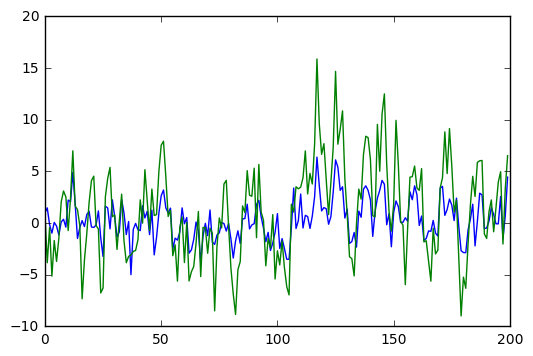

In [11]:
## Define intervalo de tempo
T = 200

## Constroi serie de dados que respeita a estrutura do modelo
m = H.shape[1]
p = H.shape[0]

y = np.array([[1.0 for i in range(p)] for t in range(T)])
x = np.array([[1.0 for i in range(m)] for t in range(T)])
    
for t in range(T):
    if p==1:
        if R==0:
            y[t] = np.dot(H,x[t])
        else:
            y[t] = y[t] + np.random.normal(0,R)
    else:
        if np.all(R==np.zeros(shape=(p,p))):
            y[t] = np.dot(H,x[t])
        else:
            y[t] = np.dot(H,x[t]) + np.random.multivariate_normal(np.zeros(p),R)
        
    if t+1<T:
        if m==1:
            if Q==0:
                x[t+1] = np.dot(F,x[t])
            else:
                x[t+1] = np.dot(F,x[t]) + np.random.normal(0,Q)
        else:
            if np.all(Q==np.zeros(shape=(m,m))):
                x[t+1] = np.dot(F,x[t])
            else:
                x[t+1] = np.dot(F,x[t]) + np.random.multivariate_normal(np.zeros(m),Q)

for i in range(p):
    plt.plot(range(T),[y[t,i] for t in range(T)])
    
data = pd.DataFrame(y).to_excel('data.xlsx')

#### Implementation
Let $a_{T|t} \equiv \mathbb{E}(x_T|y_{1:t})$ and $V_{T|t} \equiv \mathbb{V}(x_T|y_{1:t})$. Then:
$$
\begin{matrix}
a_{t+1|t} &=& \mathbb{E}(x_{t+1}|y_{1:t}) = \mathbb{E}(F_tx_{t}+\varepsilon_t|y_{1:t}) &=& F_ta_{t|t}
\\
V_{t+1|t} &=& \mathbb{V}(x_{t+1}|y_{1:t})= \mathbb{V}(F_tx_{t}+\varepsilon_t|y_{1:t}) &=& F_tV_{t|t}F_t'+Q_t
\end{matrix}
$$

Let $\nu_t\equiv y_t-H_ta_{t|t-1}$ be the predicion error. Then, starting from $a_{1|0}$ and $V_{1|0}$ we can recursevely calculate the filter *update equations*:

$$
\begin{matrix}
\nu_t &=& y_t-H_ta_{t|t-1}
\\
S_t &=& H_tV_{t|t-1}H_t'+R_t
\\
K_t &=& V_{t|t-1}H_t'S_t^{-1}
\\
a_{t|t}&=&a_{t|t-1}+K_t\nu_t
\\
V_{t|t} &=& (I_m-K_tH_t)V_{t|t-1}
\end{matrix}
$$

Where $K_t$ is the **Kalman filter gain**.

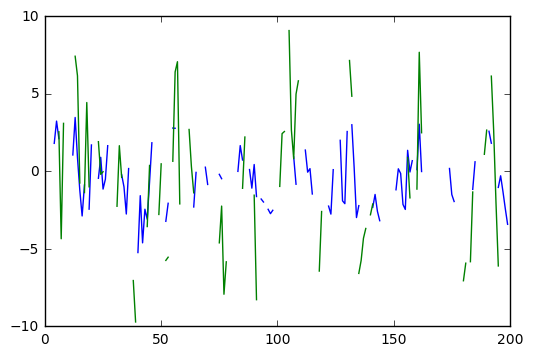

In [7]:
# Calcula Filtro de Kalman
# Memo: toma como dados y, H, R, F e Q

m = H.shape[1]
p = H.shape[0]

# Remove pontos aleatoriamente das series de dados
missProb = 0.5
yTest = np.array(y)
for t in range(T):
    for i in range(p):
        if np.random.rand(1)<missProb:
            yTest[t][i] = np.nan

for i in range(p):
    plt.plot(range(T),[yTest[t,i] for t in range(T)])

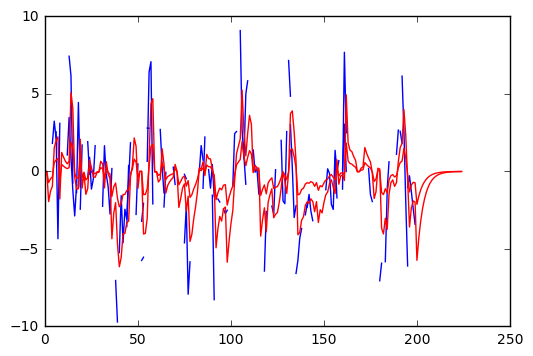

In [8]:
# Define horizonte de projecao
forecast = 25
scale = np.random.rand()

# Define variaveis de interesse
yHat  = np.zeros((T+forecast  ,p)) # np.array([[0.0 for i in range(p)] for t in range(T+forecast)])
yFull = np.append(np.array(yTest),np.array([[np.nan for i in range(p)] for t in range(forecast)]),axis=0)

nu     = np.zeros((T+forecast  ,p)) # np.array([[0.0 for i in range(p)] for t in range(T+forecast)])
a      = np.zeros((T+forecast  ,m)) # np.array([[0.0 for i in range(m)] for t in range(T+forecast)])
aMinus = np.zeros((T+forecast+1,m)) # np.array([[0.0 for i in range(m)] for t in range(T+forecast+1)])

S      = np.zeros((T+forecast  ,p,p)) # np.array([[[0.0 for i in range(p)] for j in range(p)] for t in range(T+forecast)])
V      = np.zeros((T+forecast  ,m,m)) # np.array([[[0.0 for i in range(m)] for j in range(m)] for t in range(T+forecast)])
VMinus = np.array([np.identity(m) for t in range(T+forecast+1)])
K      = np.zeros((T+forecast  ,m,p)) # np.array([[[0.0 for i in range(p)] for j in range(m)] for t in range(T+forecast)])

# Calcula filtro recursivamente
for t in range(T+forecast):
    # Filtered values
    yHat[t] = np.dot(H,aMinus[t])
    
    for i in range(p):
        if np.isnan(yFull[t][i]):
            yFull[t][i] = yHat[t][i]
    
    # Update equations    
    nu[t] = yFull[t] - np.dot(H,aMinus[t])
    S[t]  = np.dot(np.dot(H,VMinus[t]),np.transpose(H)) + R
    K[t]  = np.dot(np.dot(VMinus[t],np.transpose(H)),np.linalg.inv(S[t]))
    a[t]  = aMinus[t] + np.dot(K[t],nu[t])
    V[t]  = np.dot((np.identity(m)-np.dot(K[t],H)),VMinus[t])
    
    # Forecast equations
    aMinus[t+1] = np.dot(F,a[t])
    VMinus[t+1] = np.dot(np.dot(F,V[t]),np.transpose(F)) +  Q

# Plot
plt.plot(range(T),yTest,'blue')
plt.plot(range(T+forecast),yHat,'red')

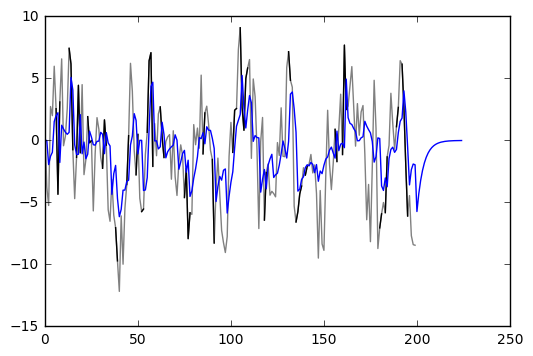

In [9]:
i = 1
plt.plot(range(T),[y[t,i] for t in range(T)],'gray')
plt.plot(range(T),[yTest[t,i] for t in range(T)],'black')
plt.plot(range(T+forecast),[yHat[t,i] for t in range(T+forecast)],'blue')

#plt.plot(range(T),[x[t] for t in range(T)],'blue')
#plt.plot(range(T+forecast),[a[t] for t in range(T+forecast)],'red')

#### Likelihood
The likelihood can be expressed as:
$$
f(y_{1:T}) = \prod^T_{t=1}f(y_t|y_{1:t-1})
$$

Where $f(y_1|y_{0:1})\equiv f(y_1)$. From the properties of the filter, we can go further:
$$
\log f(y_{1:T}) = -\frac{Tp}{2} \log2\pi-\frac{1}{2}\sum^T_{t=1}(log|S_t|+\nu_t'S_t^{-1}\nu_t)
$$


In [10]:
# Calcula a likelihood
L = 0.0
for t in range(T):
    L = L + np.linalg.det(S[t]) + np.dot(np.dot(np.transpose(nu[t]),np.linalg.inv(S[t])),nu[t])
    
L = -T*p/2* np.log(2*np.pi) - 1/2 * L
L

-2214.6238209798094